In [1]:
# Don't change this cell; just run it. 
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
state = Table.read_table("https://raw.githubusercontent.com/ds-modules/global-fa21/main/data/Table%203A.1_2.csv?token=AQZN7P2Q3J4PN2E77UEZRPLBJTFTQ")
state = state.take(np.arange(36))
state.show()

State/UT,2017,2018,2019,Percentage State Share To All-India (2019),Mid-Year Projected Female Population (in lakhs) (2019),Rate of Total Crime against Women (2019)+
Andhra Pradesh,17909,16438,17746,4.4,261.4,67.9
Arunachal Pradesh,337,368,317,0.1,7.3,43.3
Assam,23082,27687,30025,7.4,168.9,177.8
Bihar,14711,16920,18587,4.6,576.2,32.3
Chhattisgarh,7996,8587,7689,1.9,143.8,53.5
Goa,369,362,329,0.1,7.6,43.1
Gujarat,8133,8329,8799,2.2,324.9,27.1
Haryana,11370,14326,14683,3.6,135.3,108.5
Himachal Pradesh,1246,1633,1636,0.4,36.1,45.4
Jammu & Kashmir,3129,3437,3069,0.8,64.2,47.8


In [3]:
additional_data = Table().with_columns("State/UT", state.column("State/UT"), "2019 GDP Per Capita ($)", make_array(2480, 2253, 1365, 659, 1555, 7029, 3283, 3840, 3118, 1636, 1179, 3359, 3327, 1461, 3193, 1222, 1417, 2773, 1918, 1651, 2536, 1820, 6421, 3184, 3321, 1851, 1043, 3250, 1634, 3321, 5297, 'NA', 'NA', 5817, 'NA', 3334))
additional_data = additional_data.with_column("2018-2019 Unemployment Rate (%)", make_array(7.3, 11.1, 10.7, 10.5, 5.5, 9.1, 3.2, 8.7, 8.8, 10.1, 8.7, 5.2, 9.7, 7.4, 6.4, 9.2, 7.5, 9.1, 21.1, 12.7, 7, 9.5, 4.9, 6.7, 11.2, 13.5, 10.6, 13.4, 4.9, 12, 8.2, 1.8, 0, 10.8, 28.6, 6))
additional_data.show()
#literacy rate

State/UT,2019 GDP Per Capita ($),2018-2019 Unemployment Rate (%)
Andhra Pradesh,2480,7.3
Arunachal Pradesh,2253,11.1
Assam,1365,10.7
Bihar,659,10.5
Chhattisgarh,1555,5.5
Goa,7029,9.1
Gujarat,3283,3.2
Haryana,3840,8.7
Himachal Pradesh,3118,8.8
Jammu & Kashmir,1636,10.1


In [4]:
#merge two datasets by state
india = state.join("State/UT", additional_data)
india

State/UT,2017,2018,2019,Percentage State Share To All-India (2019),Mid-Year Projected Female Population (in lakhs) (2019),Rate of Total Crime against Women (2019)+,2019 GDP Per Capita ($),2018-2019 Unemployment Rate (%)
A & N Islands (UT),132,147,135,0,1.9,72.2,3321,12
Andhra Pradesh,17909,16438,17746,4.4,261.4,67.9,2480,7.3
Arunachal Pradesh,337,368,317,0.1,7.3,43.3,2253,11.1
Assam,23082,27687,30025,7.4,168.9,177.8,1365,10.7
Bihar,14711,16920,18587,4.6,576.2,32.3,659,10.5
Chandigarh (UT),453,442,515,0.1,5.4,95.2,5297,8.2
Chhattisgarh,7996,8587,7689,1.9,143.8,53.5,1555,5.5
D&N Haveli (UT),20,38,49,0,2.3,21.6,NA,1.8
Daman & Diu (UT),26,16,33,0,1.3,25.2,NA,0
Delhi (UT),13076,13640,13395,3.3,93.1,144,5817,10.8


In [5]:
def standard_units(num_array):
    arr_mean = np.mean(num_array)
    arr_sd = np.std(num_array)
    return (num_array - arr_mean) / arr_sd

In [6]:
def correlation(tbl, x, y):
    su_x = standard_units(tbl.column(x))
    su_y = standard_units(tbl.column(y))
    return np.mean(su_x * su_y)

In [7]:
india.scatter("Mid-Year Projected Female Population (in lakhs) (2019)", "Rate of Total Crime against Women (2019)+")

ValueError: label "Mid-Year Projected Female Population (in lakhs) (2019)" not in labels ('State/UT', '2017', '2018', '2019', 'Percentage State Share\nTo All-India (2019)', 'Mid-Year Projected Female\nPopulation (in lakhs) (2019)', 'Rate of Total Crime against Women (2019)+', '2019 GDP Per Capita ($)', '2018-2019 Unemployment Rate (%)')

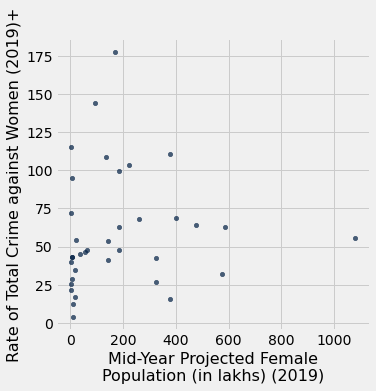

In [8]:
india.scatter("Mid-Year Projected Female\nPopulation (in lakhs) (2019)", "Rate of Total Crime against Women (2019)+")

In [9]:
correlation(india, "Mid-Year Projected Female\nPopulation (in lakhs) (2019)", "Rate of Total Crime against Women (2019)+")

0.06612365000343529

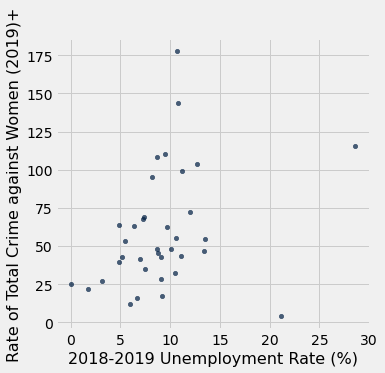

In [10]:
india.scatter("2018-2019 Unemployment Rate (%)", "Rate of Total Crime against Women (2019)+")
#outliers

In [11]:
correlation(india, "2018-2019 Unemployment Rate (%)", "Rate of Total Crime against Women (2019)+")

0.3071599733969064

In [12]:
india_1 = india.where("2019 GDP Per Capita ($)", are.not_equal_to("NA"))
india_1

State/UT,2017,2018,2019,Percentage State Share To All-India (2019),Mid-Year Projected Female Population (in lakhs) (2019),Rate of Total Crime against Women (2019)+,2019 GDP Per Capita ($),2018-2019 Unemployment Rate (%)
A & N Islands (UT),132,147,135,0,1.9,72.2,3321,12
Andhra Pradesh,17909,16438,17746,4.4,261.4,67.9,2480,7.3
Arunachal Pradesh,337,368,317,0.1,7.3,43.3,2253,11.1
Assam,23082,27687,30025,7.4,168.9,177.8,1365,10.7
Bihar,14711,16920,18587,4.6,576.2,32.3,659,10.5
Chandigarh (UT),453,442,515,0.1,5.4,95.2,5297,8.2
Chhattisgarh,7996,8587,7689,1.9,143.8,53.5,1555,5.5
Delhi (UT),13076,13640,13395,3.3,93.1,144,5817,10.8
Goa,369,362,329,0.1,7.6,43.1,7029,9.1
Gujarat,8133,8329,8799,2.2,324.9,27.1,3283,3.2


In [13]:
#summary statistics
np.average(india.column("2018-2019 Unemployment Rate (%)"))

9.197222222222221

In [14]:
np.std(india.column("2018-2019 Unemployment Rate (%)"))

4.927445028224348

In [15]:
max(india.column("2018-2019 Unemployment Rate (%)"))

28.6

In [16]:
min(india.column("2018-2019 Unemployment Rate (%)"))

0.0

In [17]:
np.median(np.average(india.column("2018-2019 Unemployment Rate (%)")))

9.197222222222221

In [18]:
#widgets